In [1]:
library(cluster)
library(classInt)
library(RColorBrewer)
library(grid)
library(rgdal)
library(ggplot2)
library(gridExtra)
library(raster)
library(lattice)

Loading required package: spData
To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source'))`
Loading required package: sp
rgdal: version: 1.2-18, (SVN revision 718)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.3, released 2017/20/01
 Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: /Library/Frameworks/R.framework/Versions/3.4/Resources/library/rgdal/proj
 Linking to sp version: 1.2-7 


In [2]:
out <- '/Users/dongmeichen/Documents/beetle/images/DEA/'

In [3]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA))
head(data)

beetleAcres lon       lat        etopo1    mStdAge    density   mfri     
1 0.9889048   -1.688095 -0.8165767 -2.085849 -1.3350325 1.5805318 -1.272927
2 0.9889048   -1.673234 -0.7636426 -1.898007 -1.0126988 1.2731710 -1.272927
3 0.9889048   -1.647397 -0.8096216 -1.906174  1.4076788 1.3656373 -1.272927
4 0.9889048   -1.650107 -0.7848950 -2.107116  2.9144370 0.9328562 -1.272927
5 1.0377935   -1.709590 -0.2661335 -2.053066  0.1262329 1.1768966 -1.272927
6 1.3365791   -1.712549 -0.2414535 -2.020680 -0.2400199 1.3839081 -1.272927
  prs       GAP1       GAP3      ⋯ summerP1_sq JanMin_sq Jan20_sq  
1 -1.181455 -0.4134775 -1.336267 ⋯ -1.1203220  -1.727787 -0.5901567
2 -1.181455 -0.4134775 -1.336267 ⋯ -1.1154629  -1.730798 -0.5901567
3 -1.181455 -0.4134775 -1.336267 ⋯ -1.1282896  -1.729906 -0.5901567
4 -1.181455 -0.4134775 -1.336267 ⋯ -1.1328530  -1.730057 -0.5901567
5 -1.181455 -0.4134775 -1.336267 ⋯ -0.7774133  -1.730436 -0.5901567
6 -1.181455 -0.4134775 -1.336267 ⋯ -0.7519392  -1.730789 -0.5901567
  PcumOctSep_sq Tmean_exp   TMarAug_exp fallTmean_exp vcc_log    mfri_log 
1 2.863514      -0.05063177 -0.09477036 -0.03941164   -2.7104504 -1.799774
2 2.342172      -0.02689908 -0.09232931 -0.01876778   -2.7104504 -1.799774
3 2.152967       0.04220516 -0.08405338  0.04636415   -2.7104504 -1.799774
4 1.979607       0.20567735 -0.06813269  0.20040765   -2.7104504 -1.799774
5 2.710080      -0.02737714 -0.09138732 -0.02090733    0.2979916 -1.799774
6 2.752733      -0.06793202 -0.09495603 -0.06064562    0.2979916 -1.799774
  Mar20_logp1
1 -0.7538392 
2 -0.7538392 
3 -0.7538392 
4 -0.7538392 
5 -0.7538392 
6 -0.7538392

In [59]:
results <- read.csv(sprintf('%s/gwr_results_16.csv', DATA))
head(results)

sum.w    X.Intercept. lon         lat          etopo1     mStdAge     
1 98.00686  1.0816342    0.08531913 -0.023414461 0.11007140  0.011236863
2 90.29744  0.9741670   -0.13240918 -0.047335261 0.10126726  0.010976434
3 78.95406 -0.1012518   -0.27701177 -0.005774951 0.11440326  0.010940942
4 80.78601  0.2359447   -0.34328874 -0.042501125 0.10602581  0.010930521
5 75.63722  0.3564594   -1.06680014 -0.131082587 0.07894489 -0.003522184
6 68.13782  0.7994738   -0.67554834 -0.144058461 0.06993989 -0.004157589
  density      prs         GAP1         GAP3        ⋯ wd_se_EDF 
1 -0.002751395  0.02048159  0.001575263 0.009741152 ⋯ 0.01420864
2 -0.002564339  0.02916621  0.001646934 0.008513781 ⋯ 0.01663127
3 -0.007198288  0.02790053  0.002617898 0.004050365 ⋯ 0.02065001
4 -0.005202423  0.03055424  0.002247884 0.004746691 ⋯ 0.02038625
5 -0.006634922 -0.01580342 -0.007729388 0.011631103 ⋯ 0.02047697
6 -0.004617754 -0.01322033 -0.007245049 0.008533587 ⋯ 0.02235236
  summerP0_se_EDF Tmean_se_EDF ddAugJul_se_EDF Tvar_se_EDF winterMin_se_EDF
1 0.1150877       0.02696194   0.05074154      0.02370636  0.07236722      
2 0.1276101       0.02918814   0.05812969      0.02673683  0.09047913      
3 0.1857806       0.03530142   0.06497976      0.03290276  0.10313454      
4 0.1725544       0.03383567   0.06596805      0.03216678  0.10583796      
5 0.1157393       0.03737899   0.08772776      0.04848556  0.15274093      
6 0.1393953       0.04340996   0.09307750      0.06616926  0.16610996      
  Acs_se_EDF pred.se.1  coord.x coord.y
1 0.5230008  0.03286590 -990000 -460000
2 0.5865711  0.02977228 -980000 -440000
3 0.7368212  0.02914831 -970000 -460000
4 0.7178075  0.03727838 -970000 -450000
5 0.6173043  0.03036248 -970000 -240000
6 0.7458493  0.03091884 -970000 -230000

In [60]:
names(results)

[1] "sum.w"               "X.Intercept."        "lon"                
 [4] "lat"                 "etopo1"              "mStdAge"            
 [7] "density"             "prs"                 "GAP1"               
[10] "GAP3"                "vpd"                 "wd"                 
[13] "summerP0"            "Tmean"               "ddAugJul"           
[16] "Tvar"                "winterMin"           "Acs"                
[19] "X.Intercept._se"     "lon_se"              "lat_se"             
[22] "etopo1_se"           "mStdAge_se"          "density_se"         
[25] "prs_se"              "GAP1_se"             "GAP3_se"            
[28] "vpd_se"              "wd_se"               "summerP0_se"        
[31] "Tmean_se"            "ddAugJul_se"         "Tvar_se"            
[34] "winterMin_se"        "Acs_se"              "gwr.e"              
[37] "pred"                "pred.se"             "localR2"            
[40] "X.Intercept._se_EDF" "lon_se_EDF"          "lat_se_EDF"         
[43] "etopo1_se_EDF"       "mStdAge_se_EDF"      "density_se_EDF"     
[46] "prs_se_EDF"          "GAP1_se_EDF"         "GAP3_se_EDF"        
[49] "vpd_se_EDF"          "wd_se_EDF"           "summerP0_se_EDF"    
[52] "Tmean_se_EDF"        "ddAugJul_se_EDF"     "Tvar_se_EDF"        
[55] "winterMin_se_EDF"    "Acs_se_EDF"          "pred.se.1"          
[58] "coord.x"             "coord.y"

In [62]:
n <- dim(results)[1]
np <- length(which(names(results)=='lon'):which(names(results)=='Acs'))
ntests <- n * np

In [63]:
coeffs <- results[, colnames(results)[colnames(results) %in% colnames(data)]]

In [64]:
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))

In [65]:
selected <- c('etopo1', 'density', 'Tmean', 'summerP0')

In [66]:
coeffs <- coeffs[, selected]
coef.vars <- colnames(coeffs)

In [67]:
head(coeffs)

etopo1     density      Tmean      summerP0   
1 0.11007140 -0.002751395 0.04895076 0.281224457
2 0.10126726 -0.002564339 0.05852575 0.287456813
3 0.11440326 -0.007198288 0.01855269 0.027312172
4 0.10602581 -0.005202423 0.03569042 0.118565358
5 0.07894489 -0.006634922 0.03590265 0.078408932
6 0.06993989 -0.004617754 0.01020826 0.009691142

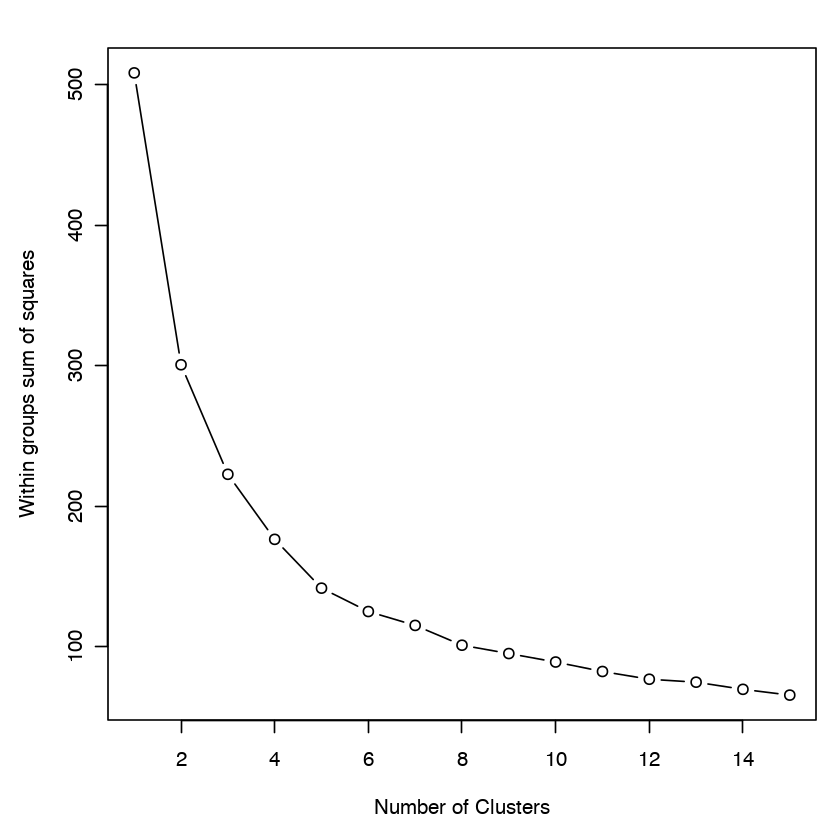

In [68]:
wss <- (nrow(coeffs)-1)*sum(apply(coeffs,2,var))
par(mfrow=c(1,1),mar=c(5,4.5,2,1))
for (i in 2:15) wss[i] <- sum(kmeans(coeffs, centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares") 

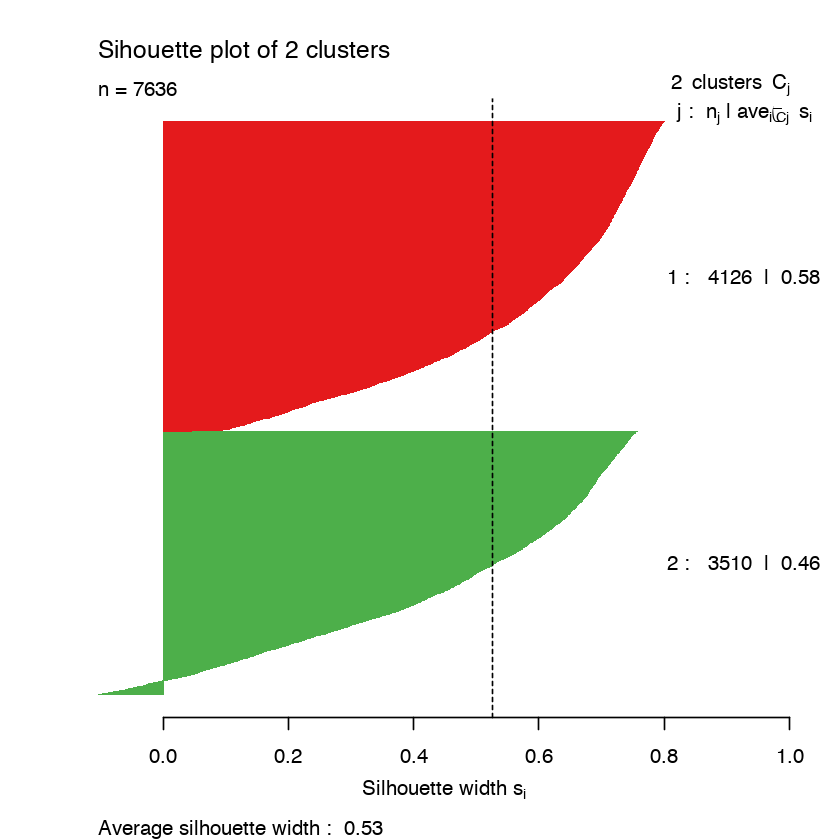

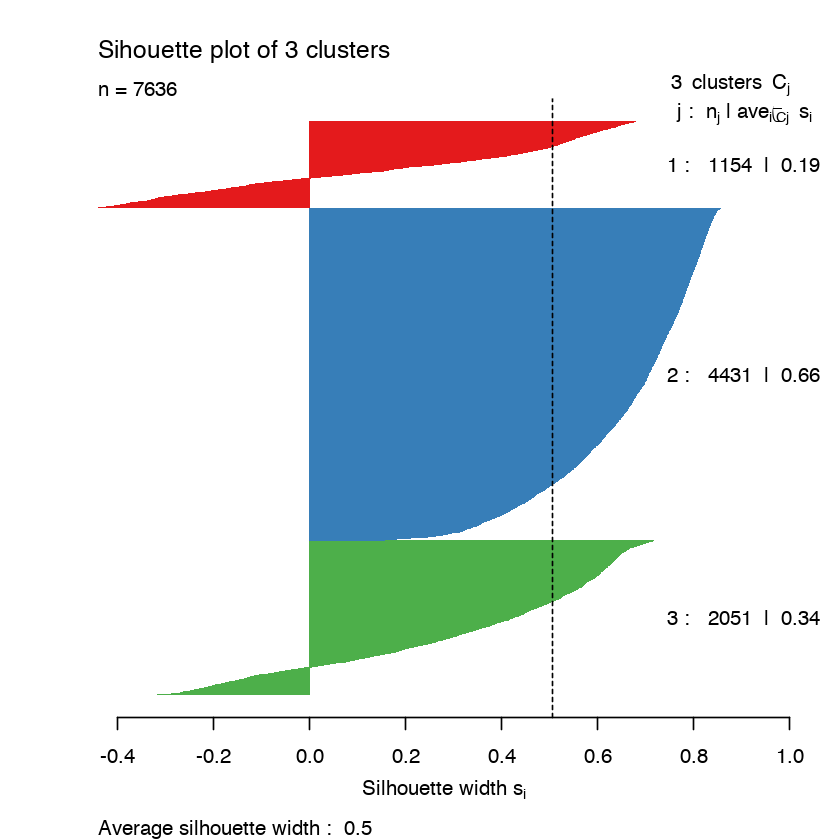

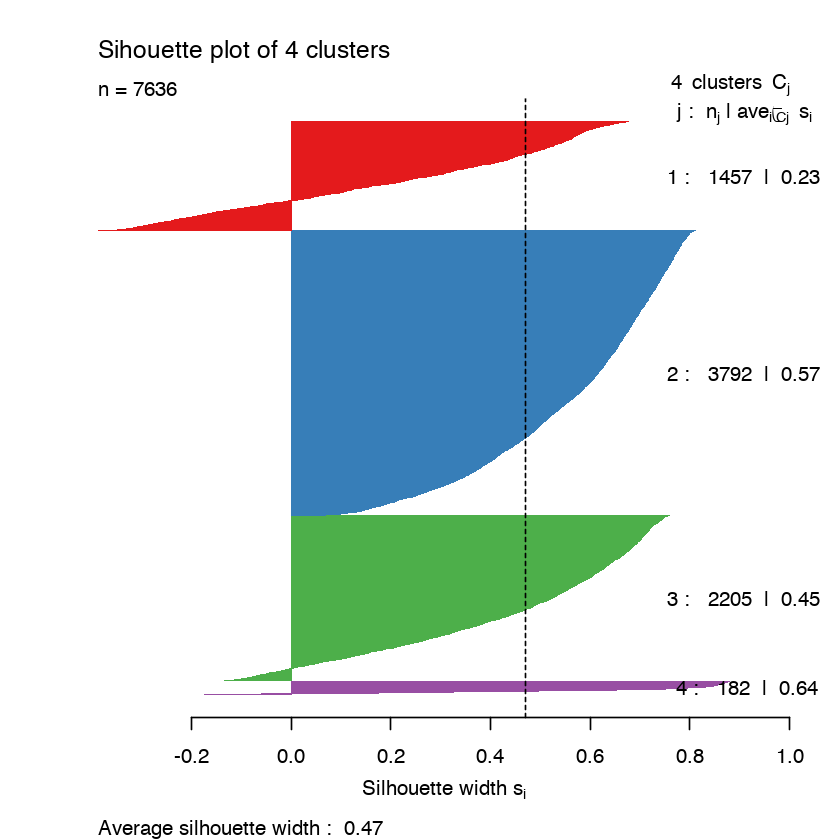

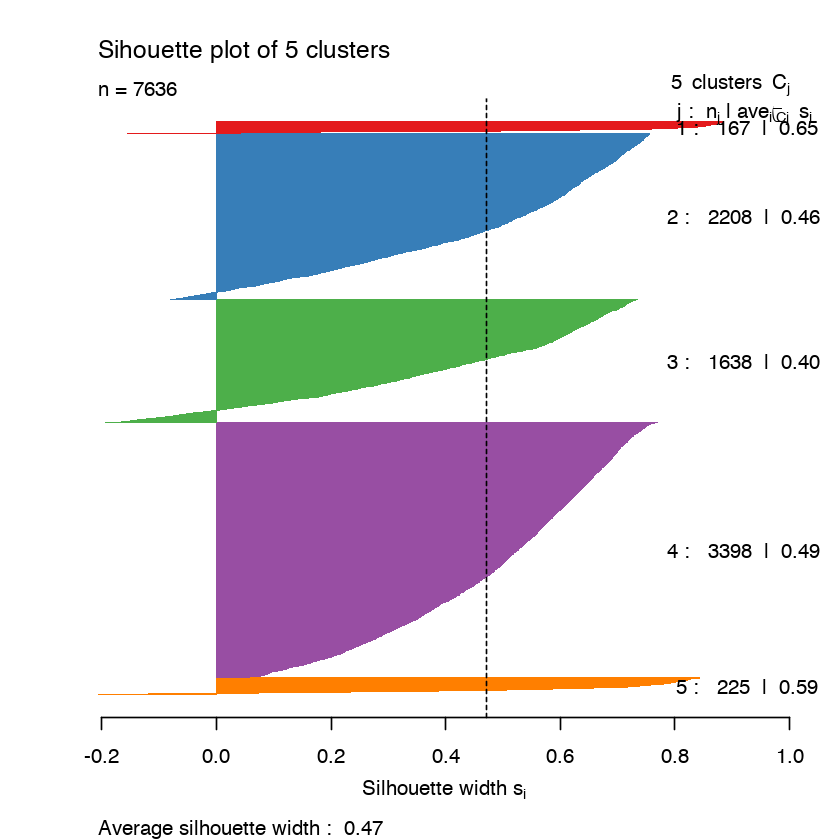

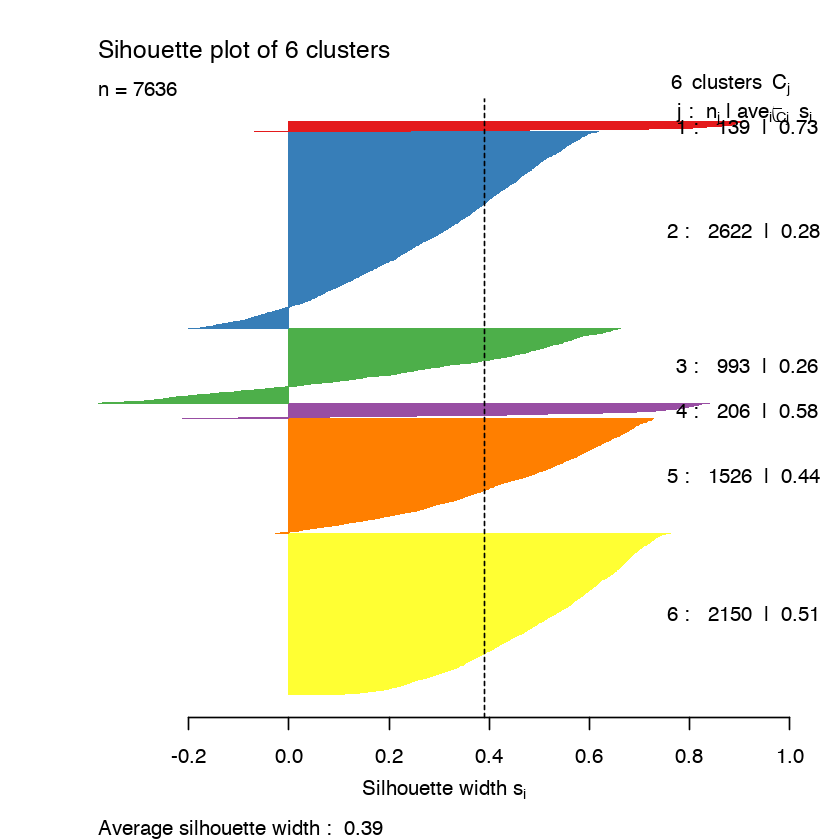

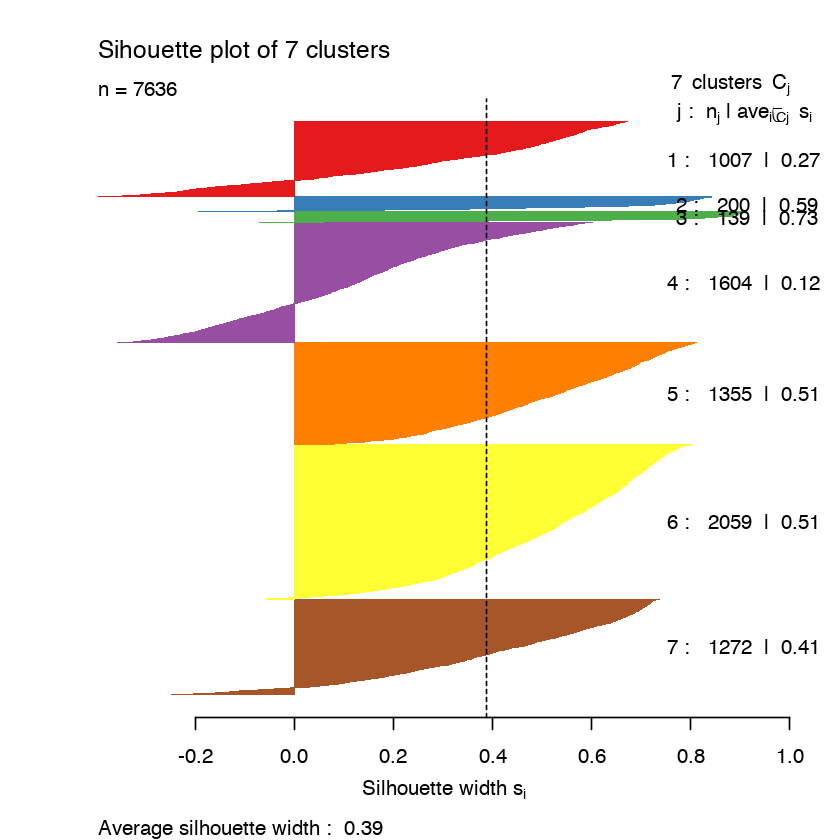

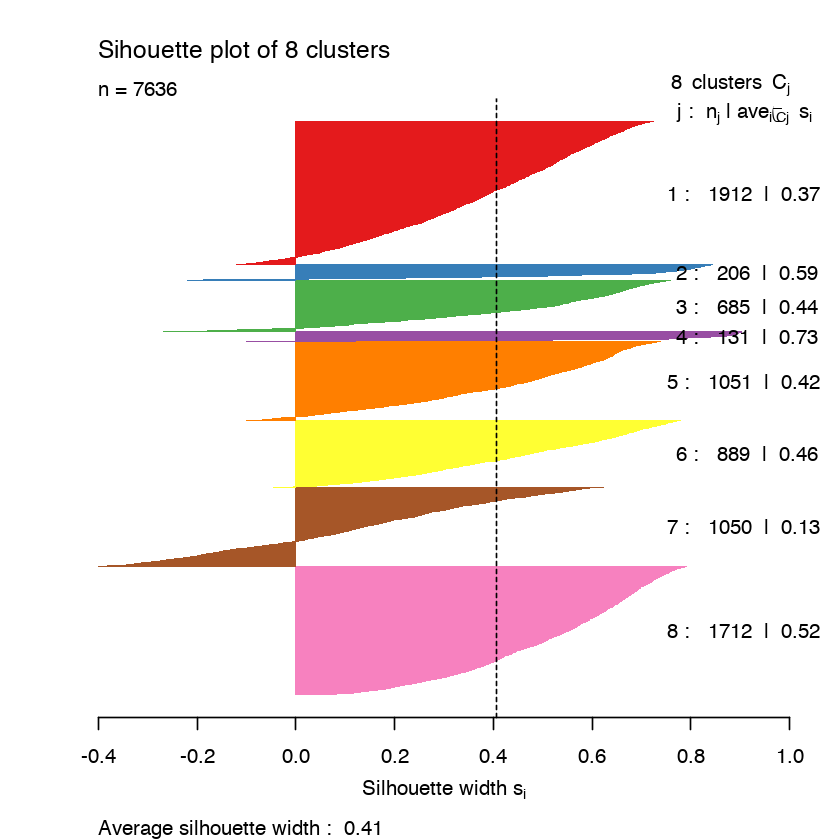

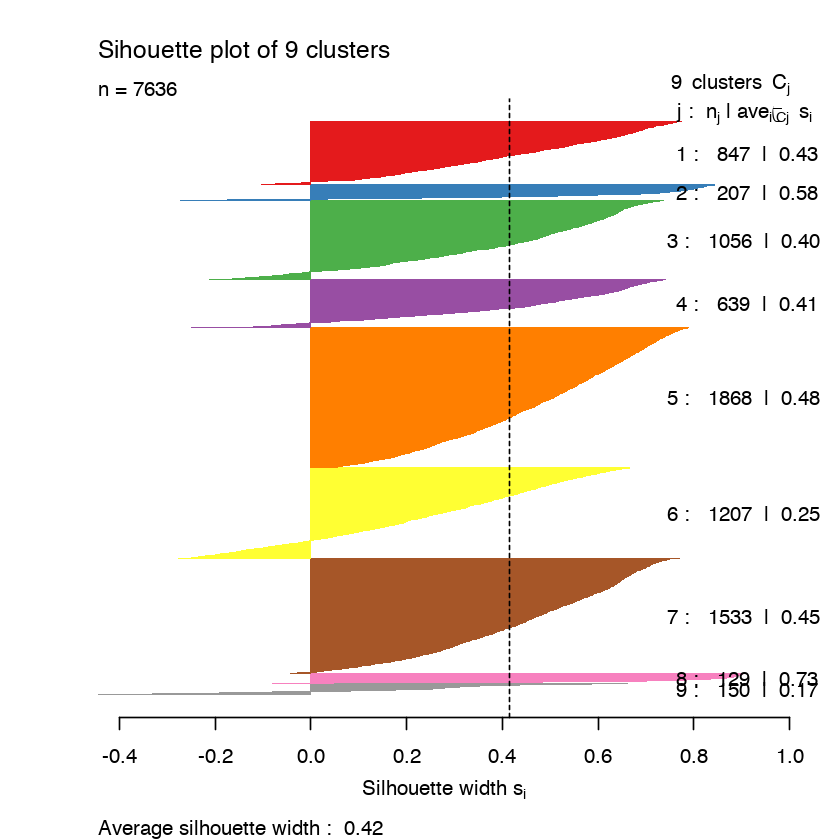

In [69]:
w <- vector()
par(mfrow=c(1,1))
for(ncluster in 2:9){
    nclr <- ncluster
    if(nclr > 2){
        plotclr <- brewer.pal(nclr,"Set1") 
    }else{
        plotclr <- c("#E41A1C", "#4DAF4A")
    }
    fit <- kmeans(coeffs, ncluster)
    dis <- dist(coeffs)^2
    sil <- silhouette(fit$cluster, dis)
    plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
    abline(v=mean(sil[,3]), lty=2)
    w[ncluster] <- mean(sil[,3])
}

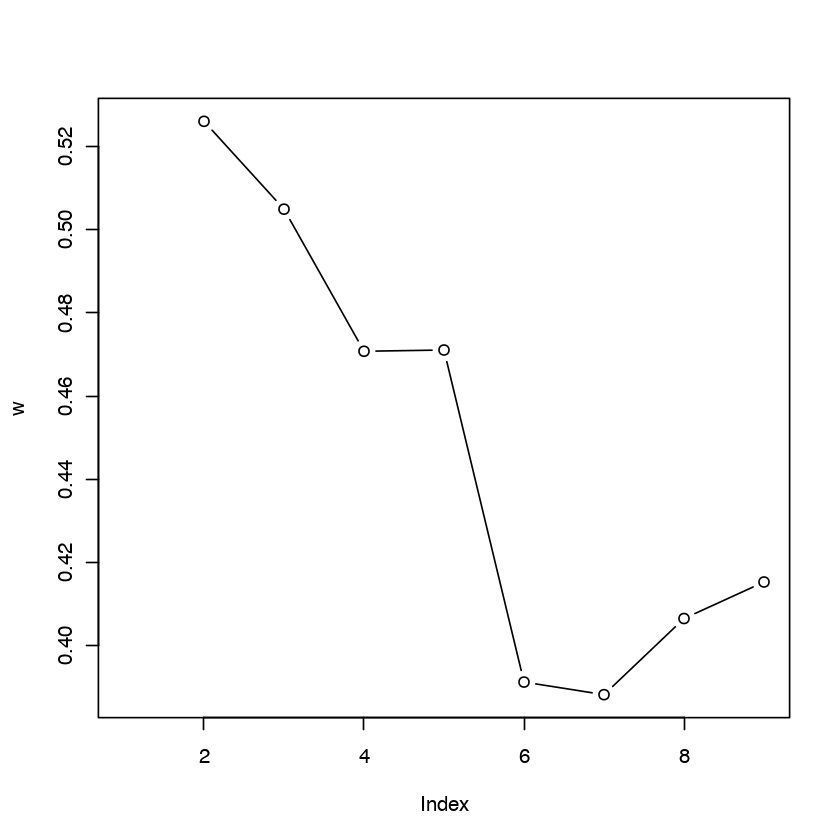

In [70]:
plot(w, type='b')

stop here...

In [31]:
mpb10km_poly <- readOGR(dsn='/Users/dongmeichen/Documents/beetle/shp', 
                           layer='mpb10km')
mpb_projstr <- "+proj=laea +lon_0=-112.5 +lat_0=45 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
proj4string(mpb10km_poly) <- mpb_projstr
mpb10km_lines <- fortify(mpb10km_poly, region="SP_ID")

OGR data source with driver: ESRI Shapefile 
Source: "/Users/dongmeichen/Documents/beetle/shp", layer: "mpb10km"
with 17 features
It has 2 fields


Warning message in ReplProj4string(obj, CRS(value)):
“A new CRS was assigned to an object with an existing CRS:
+proj=laea +lat_0=45 +lon_0=-112.5 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
without reprojecting.
For reprojection, use function spTransform”

In [32]:
data.gwr <- cbind(data, xy)

In [71]:
ncluster <- 2
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}

In [72]:
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)

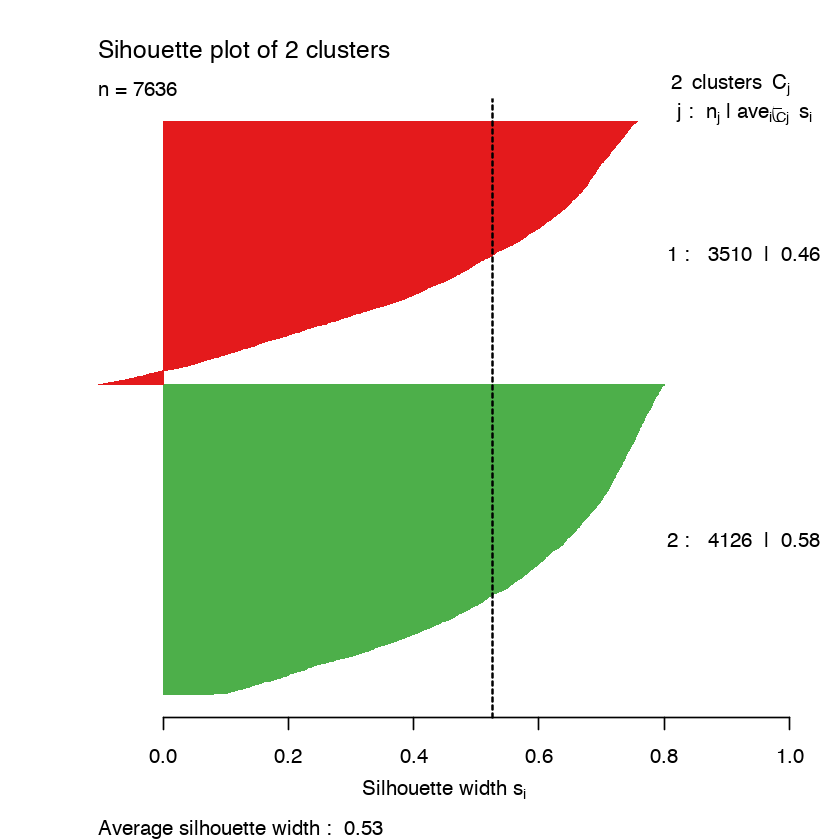

In [73]:
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2, lwd=1.5)

In [74]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

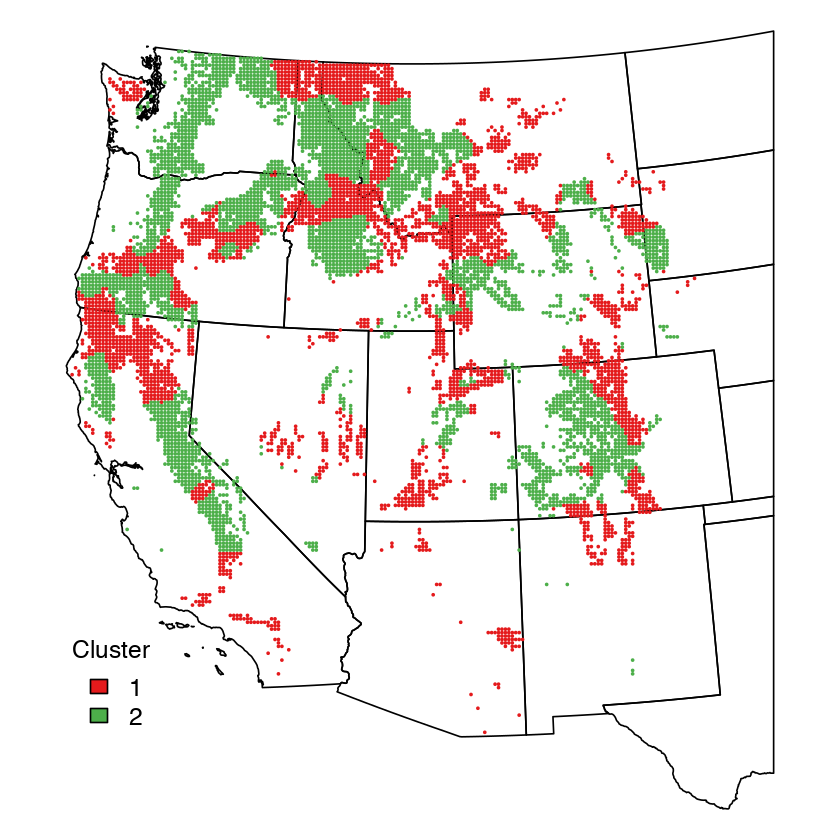

In [75]:
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend(-1000000, -1200000, legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=1.2, bty="n")

In [76]:
coeffs.updated <- data.frame(coeffs, fit$cluster)

In [77]:
titles <- c('Elevation', 'Tree density', 'MPB life cycle mean temprature', 'Summer precipitation')

In [78]:
coef.vars

[1] "etopo1"   "density"  "Tmean"    "summerP0"

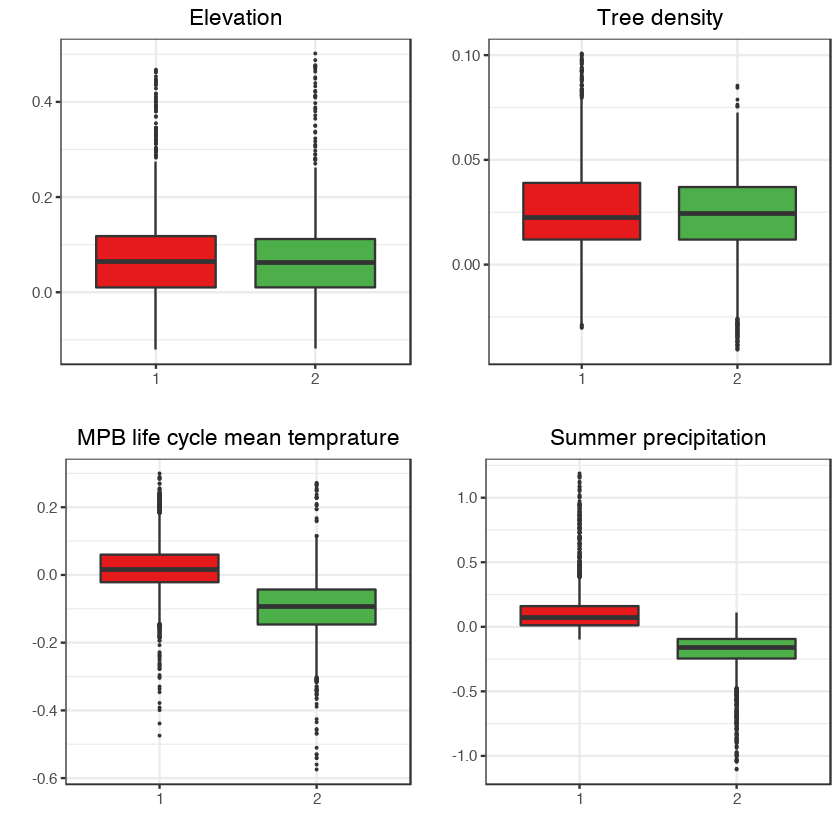

In [79]:
vplayout <- function(x, y) viewport(layout.pos.row = x, layout.pos.col = y)
n1 <- c(rep(1,2),rep(2,2)); n2 <- rep(c(1,2),2) 
#png(paste0(out,"boxplot_clusters_scaled.png"), width=8, height=8, units="in", res=300)
grid.newpage()
pushViewport(viewport(layout = grid.layout(2, 2)))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_bw()+theme(legend.position="none", plot.title = element_text(hjust = 0.5)) 
    print(g, vp = vplayout(n1[i], n2[i]))
}
#dev.off()

stop here ...

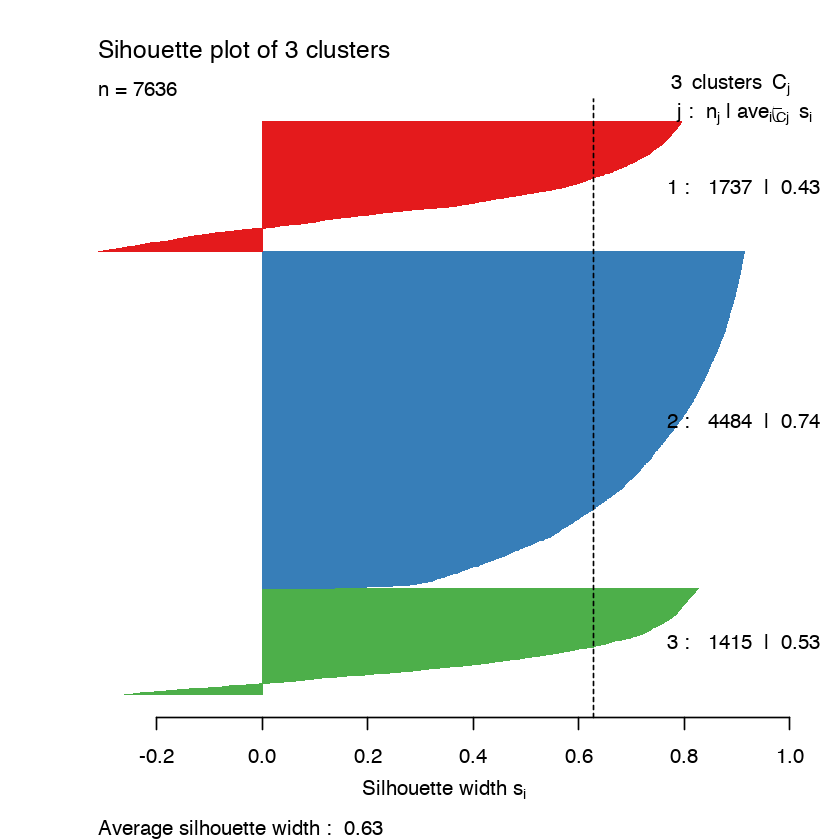

In [27]:
ncluster <- 3
nclr <- ncluster
if(nclr > 2){
    plotclr <- brewer.pal(nclr,"Set1") 
}else{
    plotclr <- c("#E41A1C", "#4DAF4A")
}
fit <- kmeans(coeffs, ncluster)
dis <- dist(coeffs)^2
sil <- silhouette(fit$cluster, dis)
plot(sil, col=plotclr, main=paste('Sihouette plot of', ncluster, 'clusters'))
abline(v=mean(sil[,3]), lty=2)

Warning message in classIntervals(plotvar, nclr, style = "equal"):
“n same as number of different finite values\neach different finite value is a separate class”

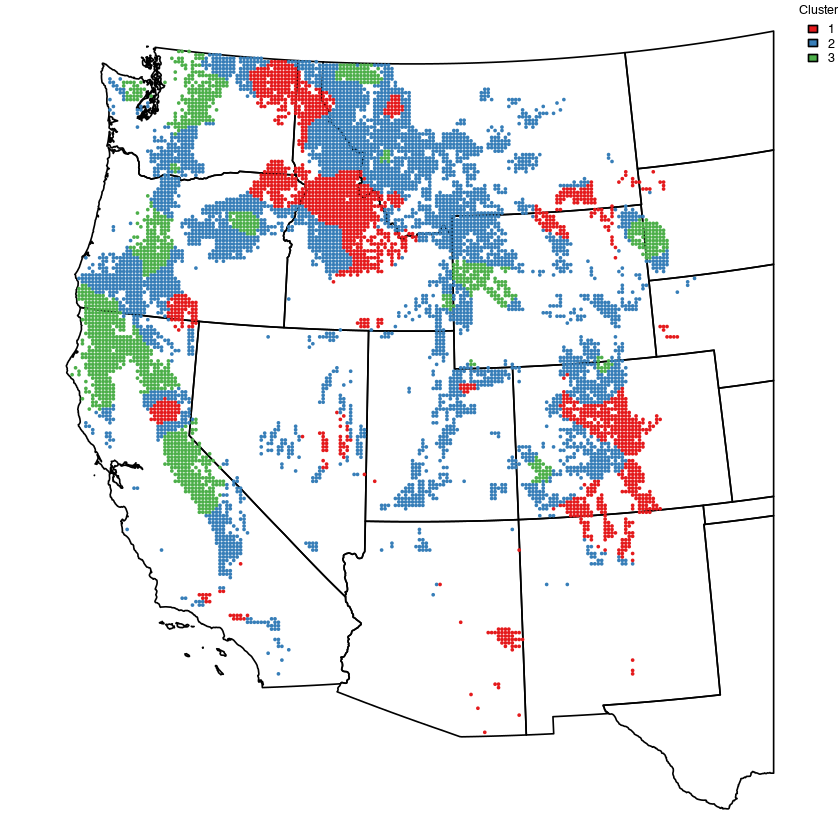

In [28]:
plotvar <- fit$cluster
class <- classIntervals(plotvar, nclr, style="equal")
colcode <- findColours(class, plotclr)
par(mfrow=c(1,1),mar=c(0,0,0,0))
plot(mpb10km_poly)
points(xy$x, xy$y, pch=16, col=colcode, cex=0.3)
legend('topright', legend=sort(unique(fit$cluster)), title='Cluster',
    fill=attr(colcode, "palette"), cex=0.6, bty="n")

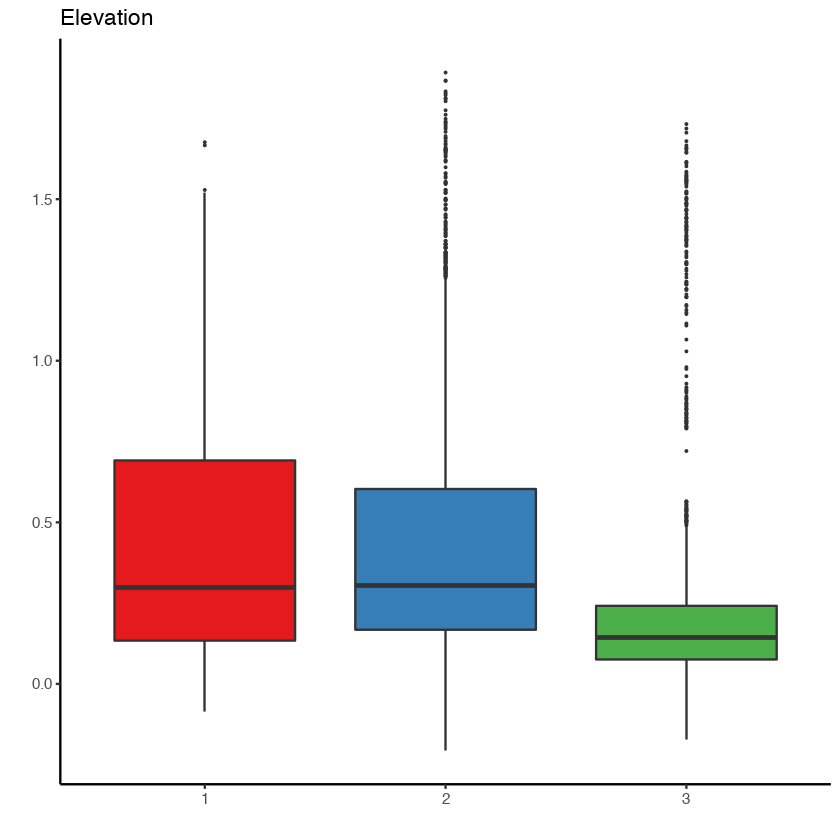

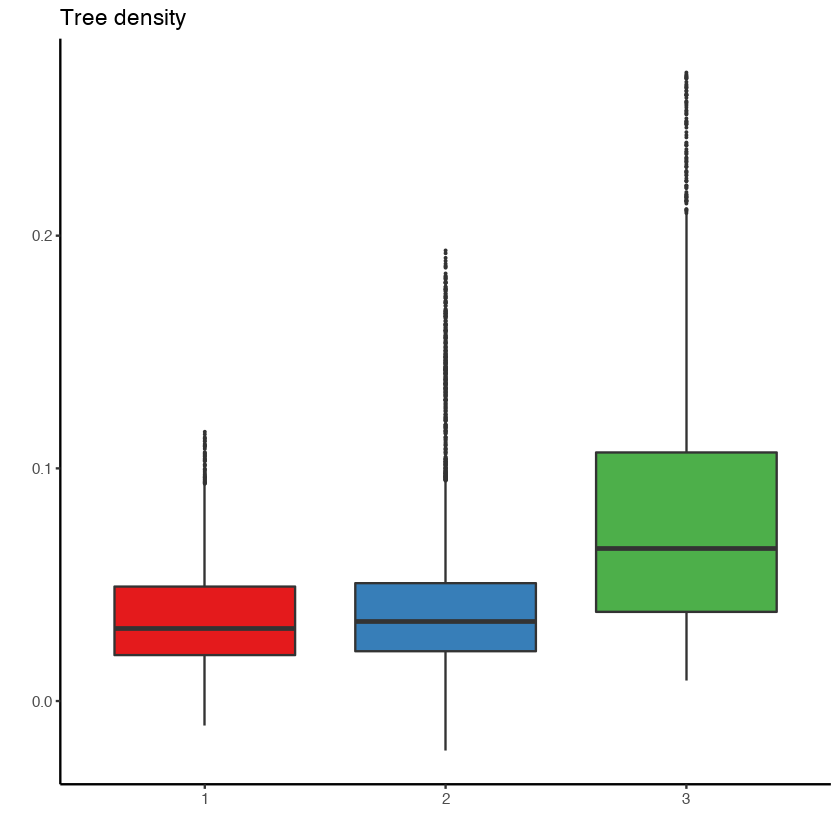

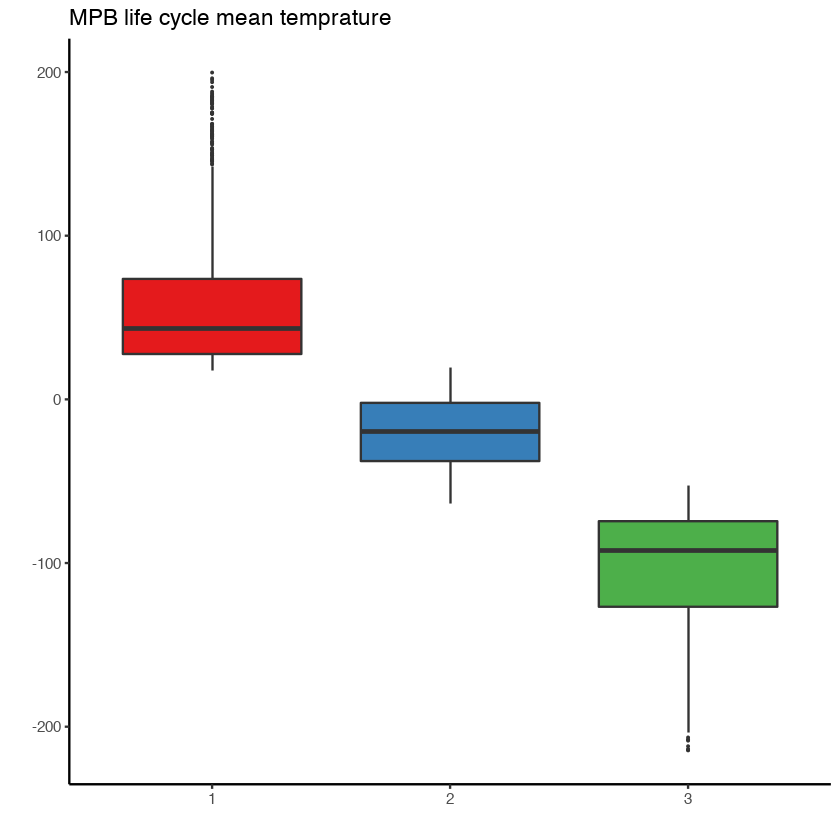

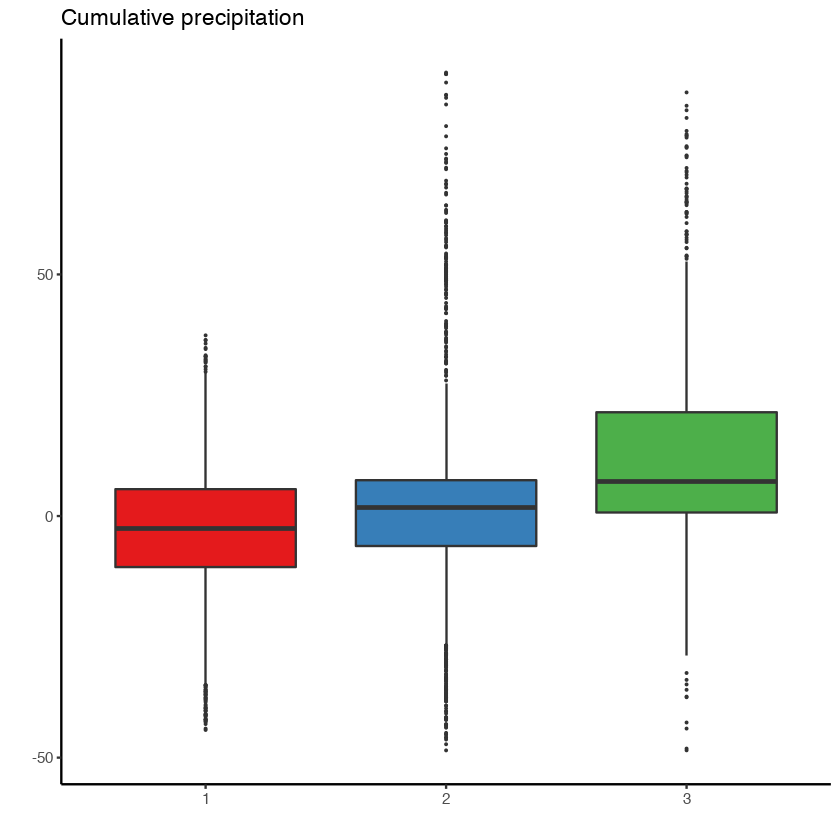

In [29]:
coeffs.updated <- data.frame(coeffs, fit$cluster)
par(mfrow=c(1, 1))
for(v in coef.vars){
    i <- which(coef.vars==v)
    sdf <- coeffs.updated[, c(v, 'fit.cluster')]
    colnames(sdf)[1] <- 'var'
    g <- ggplot(sdf, aes(x=as.factor(fit.cluster), y=var, fill=as.factor(fit.cluster)))+
      scale_fill_manual(values = plotclr) +
      geom_boxplot(outlier.size = 0.05)+labs(title=titles[i], x="", y = '')+
      theme_classic() + theme(legend.position="none") 
    print(g)
}

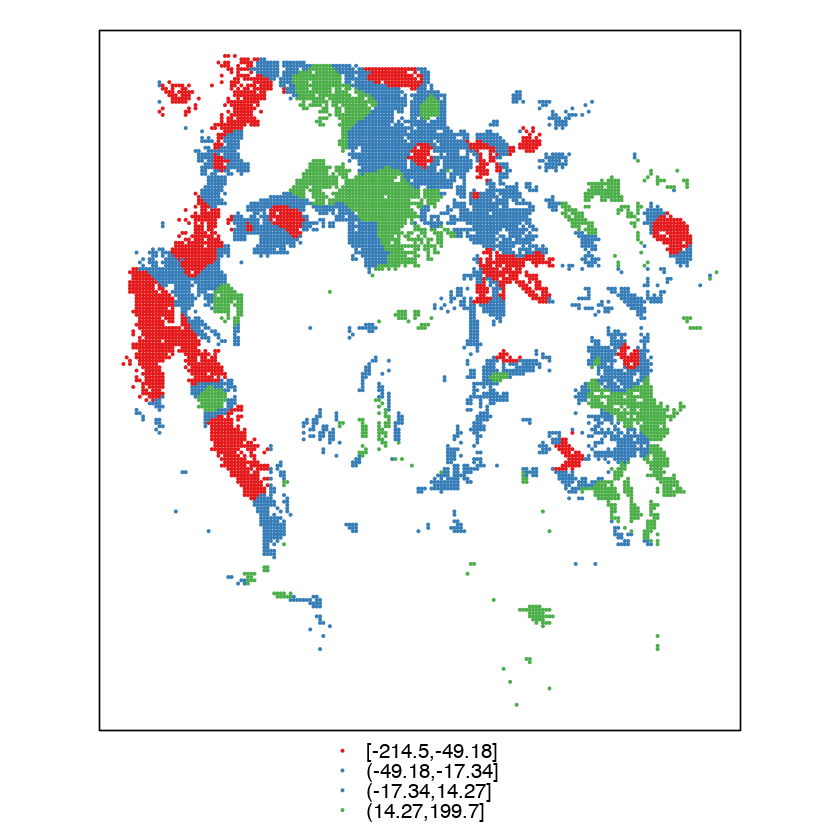

In [30]:
colours <- brewer.pal(3,"Set1")
xy <- read.csv(sprintf('%s/mpb10km_data_wo_FIA_xy.csv', DATA))
map.resids <- SpatialPointsDataFrame(data=data.frame(results[,'Tmean']), coords=cbind(xy$x,xy$y)) 
spplot(map.resids, cuts=quantile(results[,'Tmean']), col.regions=colours, cex=0.3) 

In [31]:
vars <- selected

In [32]:
enp <- 1601.442 
for(v in vars){
    results[,paste0(v, '_t')] <- results[,v] / results[,paste0(v, '_se')]
    t <- results[,paste0(v, '_t')]
    pvals <- round(2 * (1 - pt(abs(t), enp)), 3)
    results[,paste0(v, '_p')] <- pvals
    results[,paste0(v, '_p_by')] <- round(p.adjust(pvals, "BY", n = ntests))
    results[,paste0(v, '_p_bh')] <- round(p.adjust(pvals, "BH", n = ntests))
    results[,paste0(v, '_p_bo')] <- round(p.adjust(pvals, "bonferroni", n = ntests))
    asf_pvals <- round(pvals * (1 + enp - (enp/ntests)), 3)
    asf_pvals[asf_pvals > 1] <- 1
    results[,paste0(v, '_p_fb')] <- asf_pvals
}

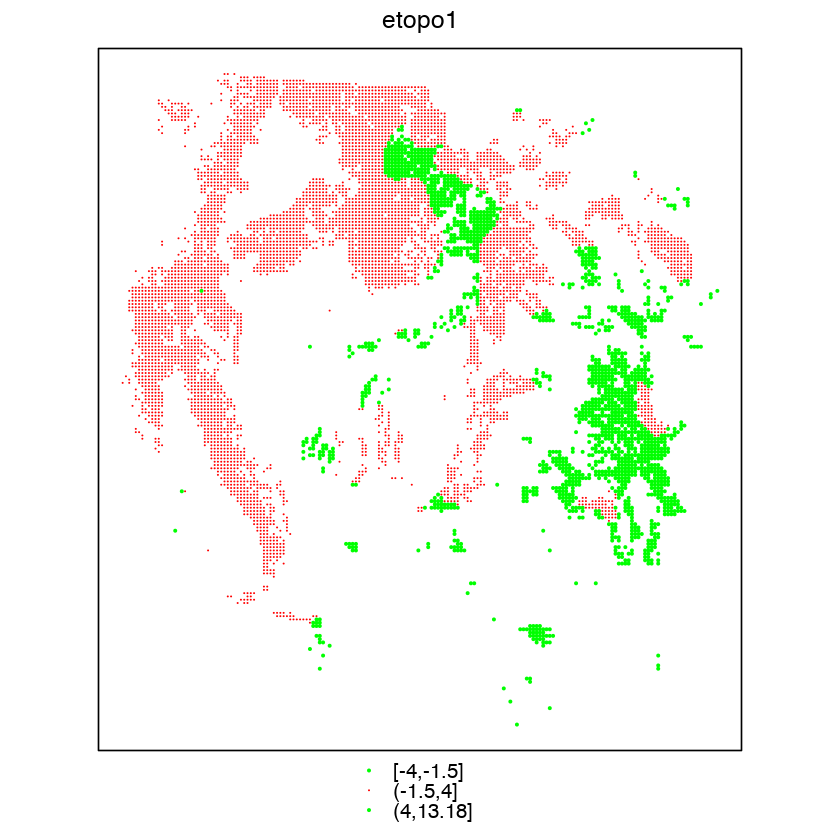

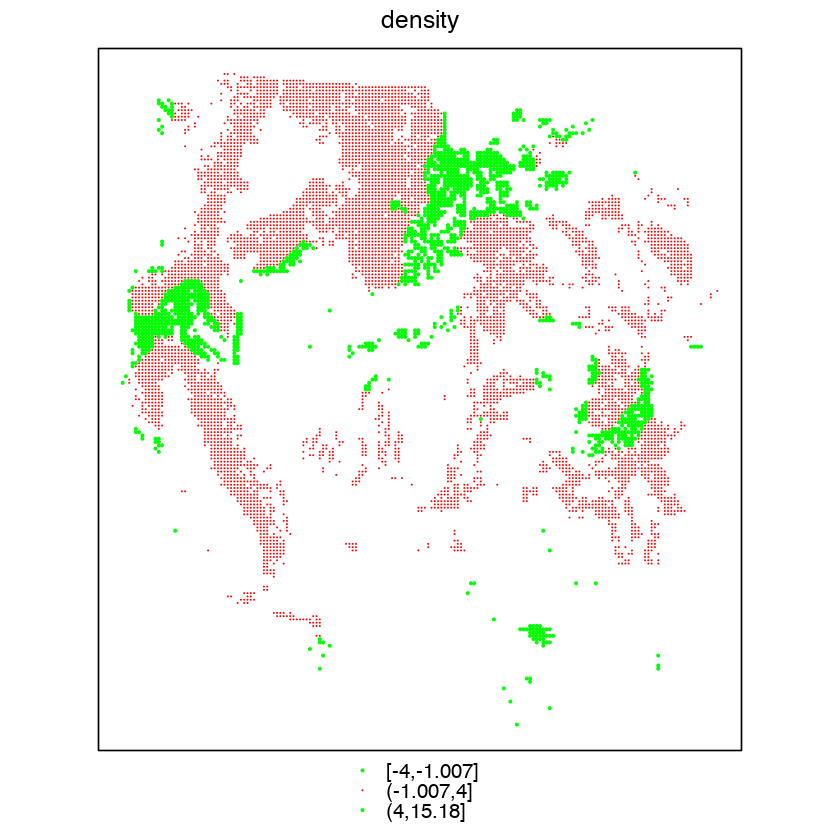

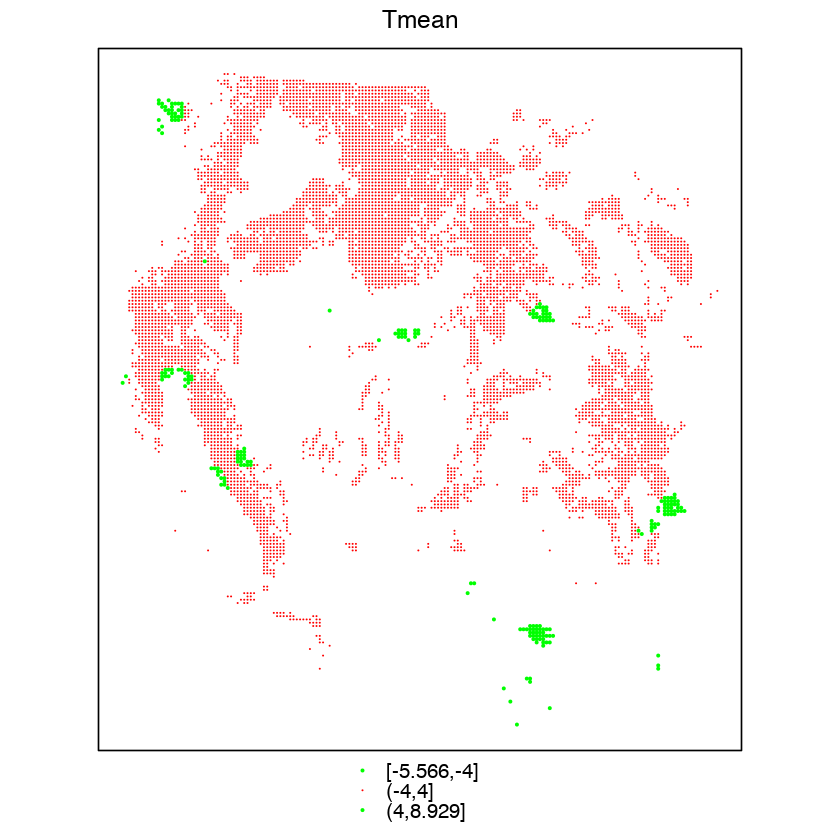

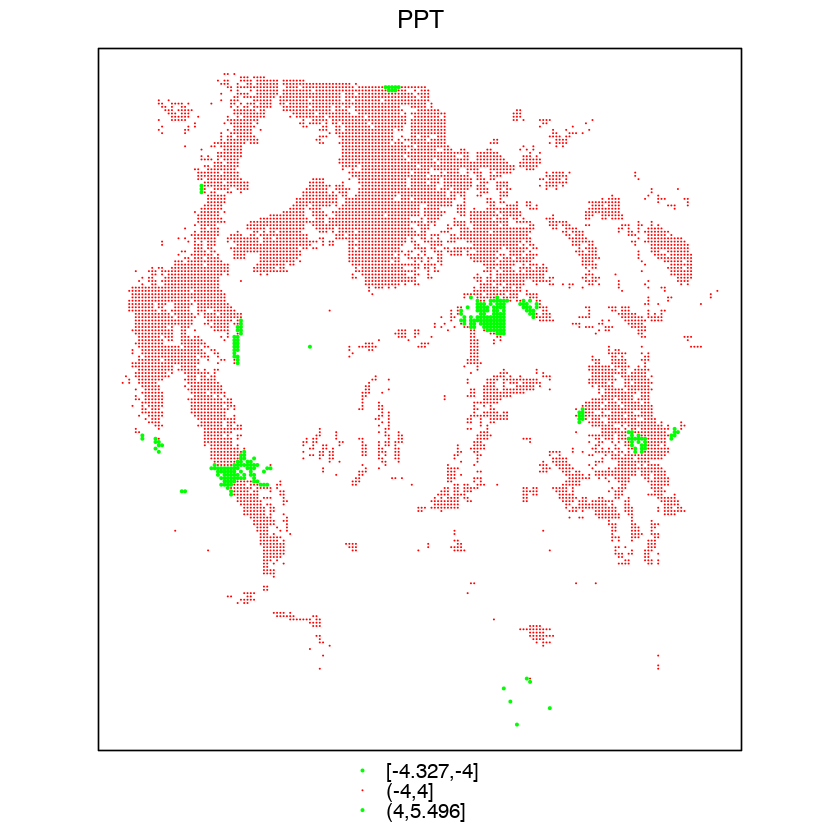

In [33]:
for(v in vars){
    t <- results[,paste0(v, '_t')]
    sig.map <- SpatialPointsDataFrame(data=data.frame(t), coords=cbind(xy$x,xy$y))
    colours <- c("green","red","green")
    breaks <- c(min(t),-4,4,max(t))
    print(spplot(sig.map, cuts=breaks, col.regions=colours, cex=c(0.3,0.1,0.3), main=v))
}

In [34]:
SDF <- SpatialPointsDataFrame(data=data.frame(results), coords=cbind(xy$x,xy$y))

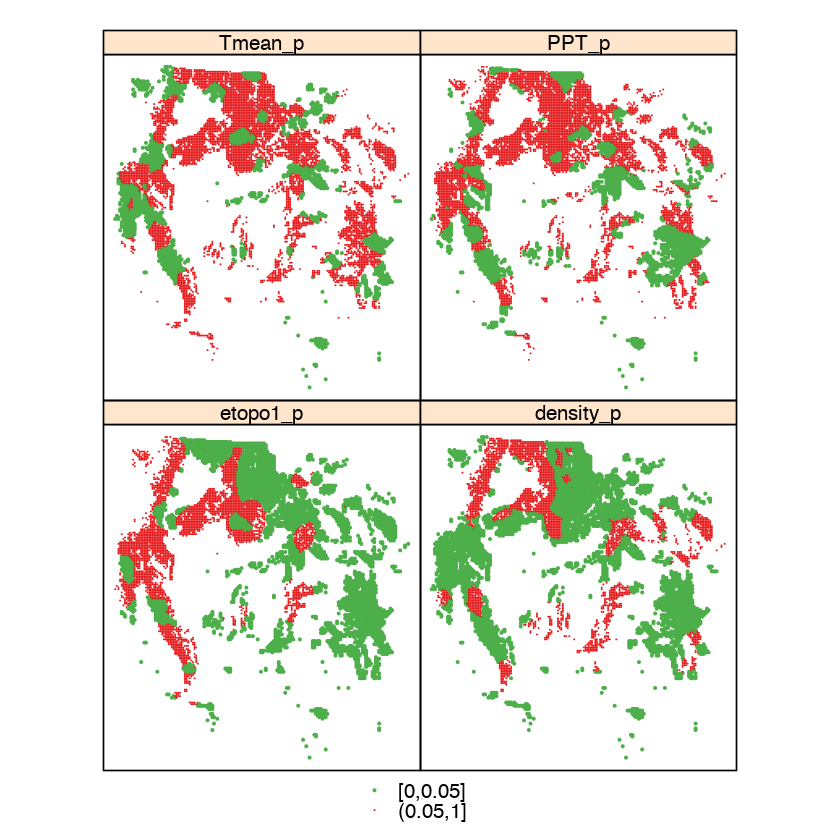

In [35]:
spplot(SDF, paste0(vars, '_p'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))

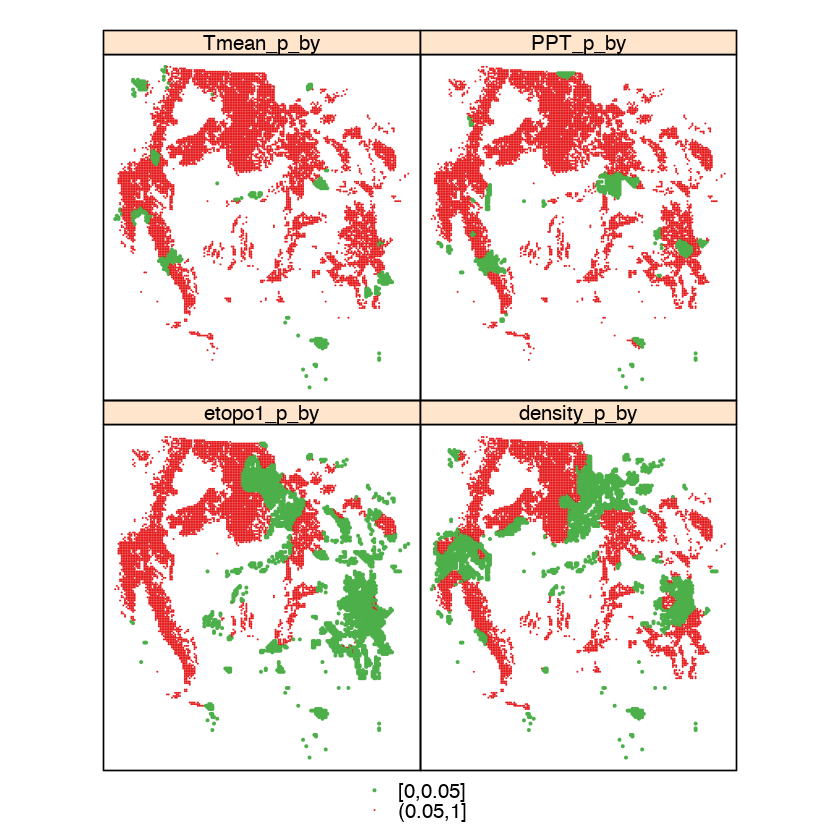

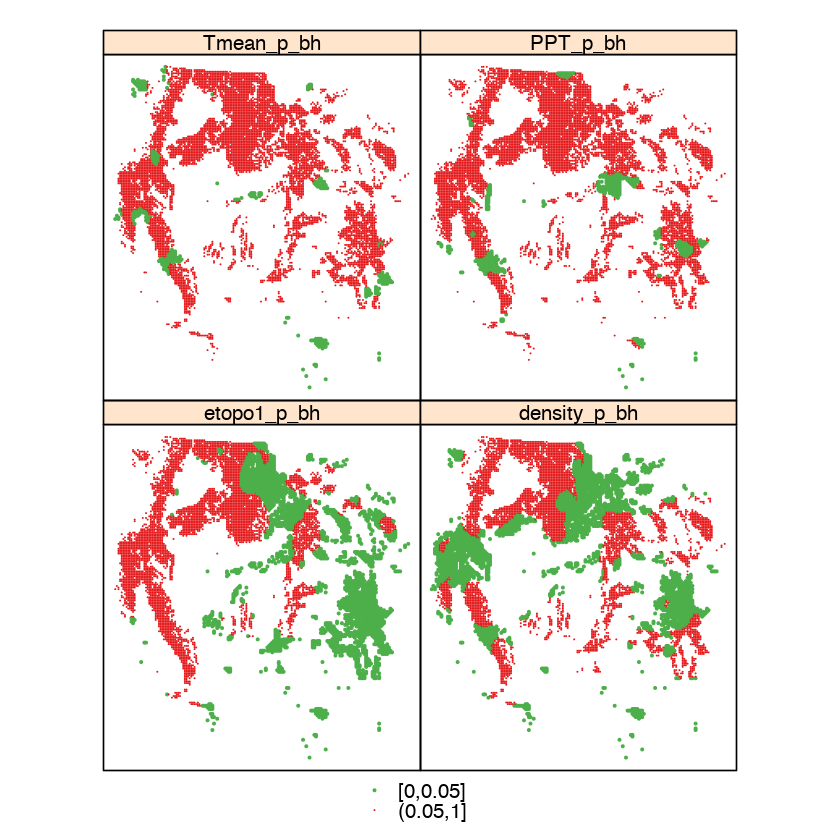

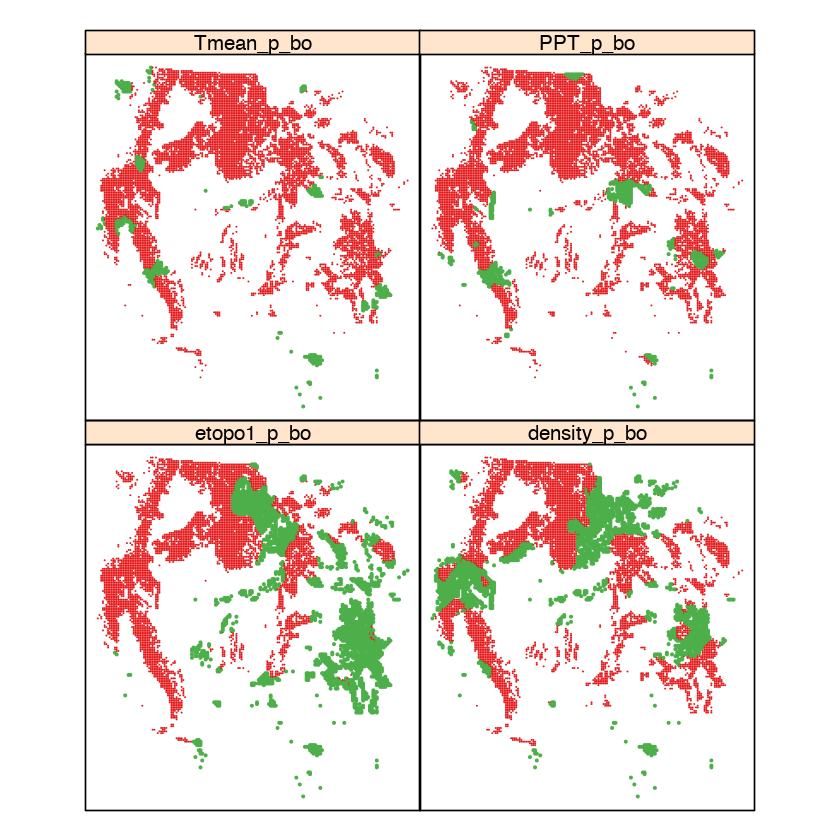

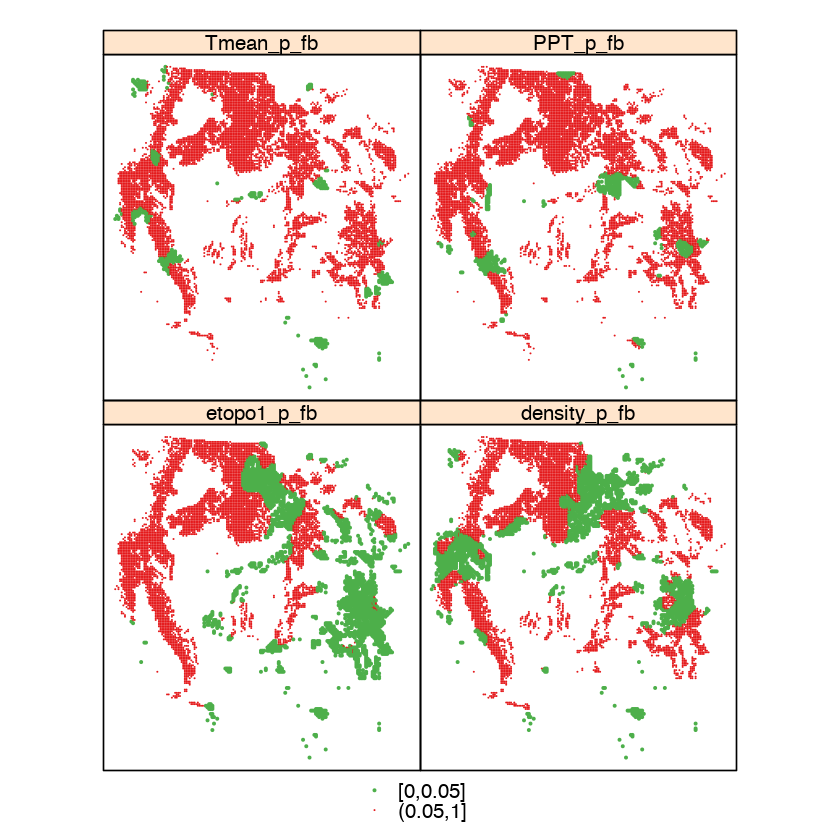

In [36]:
spplot(SDF, paste0(vars, '_p_by'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bh'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))
spplot(SDF, paste0(vars, '_p_bo'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), 
       cex=c(0.3,0.1), auto.key=FALSE)
spplot(SDF, paste0(vars, '_p_fb'), cuts=c(0, 0.05, 1), col.regions=c("#4DAF4A","#E41A1C"), cex=c(0.3,0.1))